In [13]:
import pandas as pd
import numpy as np


In [14]:
CarPrice = pd.read_csv("CarPrice.csv")
CarPrice_df = pd.DataFrame(CarPrice )
CarPrice_df1 = pd.DataFrame(CarPrice)
CarPrice_df1.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [33]:
# update carprice
CarPrice_df1['CarName']=CarPrice_df1['CarName'].apply(lambda x: x.split(' ')[0])
CarPrice_df1['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan','vw': 'volkswagen','porcshce': 'porsche','vokswagen': 'volkswagen','toyouta': 'toyota'},inplace=True)
CarPrice_df1['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [34]:
CarPrice_df1.drop(129, axis=0, inplace=True)
CarPrice_df1.drop(18, axis=0, inplace=True)
CarPrice_df1.drop(49, axis=0, inplace=True)
CarPrice_df1.drop(29, axis=0, inplace=True)
CarPrice_df1.drop(46, axis=0, inplace=True)

KeyError: '[129] not found in axis'

In [26]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

column_trans = ColumnTransformer(transformers=[ 
    ('tnf1',OneHotEncoder(sparse =False,drop='first'),['fueltype', 'aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem','cylindernumber']),
    ('tnf2',MinMaxScaler(), ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']),
    ('tnf3',OrdinalEncoder(categories=[['two','four']]),['doornumber'])
],remainder='passthrough')

In [35]:
x = CarPrice_df1.drop(['price','car_ID', 'CarName'], axis=1)
y = CarPrice_df1['price']

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [37]:
column_trans.fit_transform(x_train)


array([[1.        , 0.        , 0.        , ..., 0.32258065, 0.35294118,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.77419355, 0.76470588,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.5483871 , 0.64705882,
        1.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.32258065, 0.38235294,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.5483871 , 0.61764706,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.12903226, 0.20588235,
        1.        ]])

In [30]:
CarPrice_df1.corr().tail(1)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
price,-0.115584,-0.069499,0.588227,0.688051,0.7463,0.176716,0.828868,0.873014,0.541468,0.109278,0.064879,0.804041,-0.10099,-0.682201,-0.701335,1.0


<AxesSubplot:>

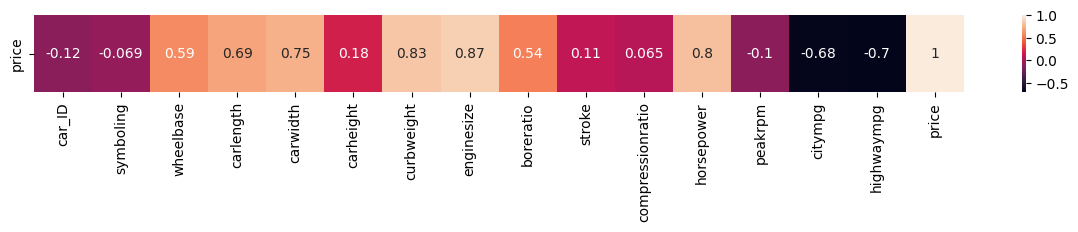

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,1))
sns.heatmap(CarPrice_df1.corr().tail(1), annot = True)#Value with lighter shade would be drop

# Spearman Coedfficient method

<AxesSubplot:>

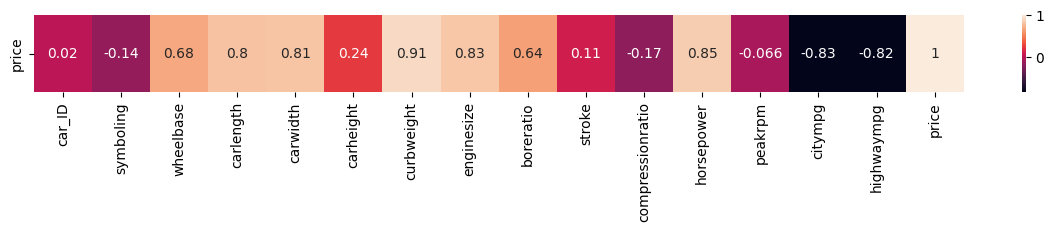

In [20]:
plt.figure(figsize = (15,1))
sns.heatmap(CarPrice_df1.corr(method = 'spearman').tail(1), annot = True)

# Kendall coreelation

# 2 Fishers Rank

In [27]:
!pip install skfeature-chappers

     ---------------------------------------- 66.3/66.3 kB 1.8 MB/s eta 0:00:00


In [8]:
from skfeature.function.similarity_based import fisher_score

In [32]:
x = CarPrice_df1.drop('price',axis = 1)
y = CarPrice_df1['price']

In [38]:
rank = fisher_score.fisher_score(x.values,y)
rank

C:\Users\hp\anaconda3\envs\cpp\lib\site-packages\skfeature\utility\construct_W.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  class_idx_all = class_idx[:, np.newaxis] & class_idx[np.newaxis, :]


TypeError: can't multiply sequence by non-int of type 'float'

# Variance Threshold method

In [33]:
var = 0
std = 0


In [34]:
CarPrice_df1.var()

C:\Users\hp\AppData\Local\Temp\ipykernel_31152\3224108680.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  CarPrice_df1.var()


car_ID              3.519167e+03
symboling           1.550789e+00
wheelbase           3.626178e+01
carlength           1.522087e+02
carwidth            4.601900e+00
carheight           5.970800e+00
curbweight          2.711079e+05
enginesize          1.734114e+03
boreratio           7.335631e-02
stroke              9.834309e-02
compressionratio    1.577710e+01
horsepower          1.563741e+03
peakrpm             2.275153e+05
citympg             4.279962e+01
highwaympg          4.742310e+01
price               6.382176e+07
dtype: float64

In [11]:
# ridge_model = Ridge(alpha =2)
# pipe = make_pipeline(column_trans, ridge_model)
# pipe.fit(x_train, y_train)


In [42]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline

vt = VarianceThreshold(threshold = 0.0)
pipe = make_pipeline(column_trans, vt)
pipe.fit_transform(x_train)


array([[1.        , 0.        , 0.        , ..., 0.32258065, 0.35294118,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.77419355, 0.76470588,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.5483871 , 0.64705882,
        1.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.32258065, 0.38235294,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.5483871 , 0.61764706,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.12903226, 0.20588235,
        1.        ]])